In [47]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import json


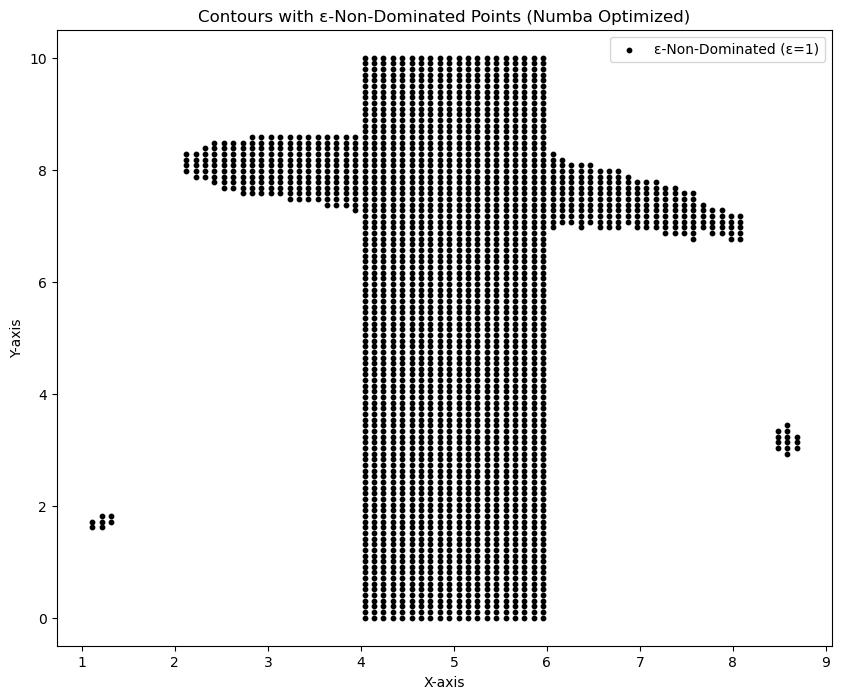

In [52]:
# Define the Himmelblau function
@njit
def himmelblau(x, y):
    return ((x-5) ** 2 + (y-5) - 11) ** 2 + (x-5 + (y-5) ** 2 - 7) ** 2


# Define the Paraboloid function (x^2 + y^2)
@njit
def paraboloid(x, y):
    return (x-5) ** 2


# Define the epsilon dominance condition
@njit
def epsilon_dominates(f1_x, f2_x, f1_y, f2_y, epsilon):
    return (f1_y <= f1_x - epsilon) and (f2_y <= f2_x - epsilon)


# Function to find epsilon-non-dominated points
@njit
def find_epsilon_non_dominated_points(X, Y, Z1, Z2, epsilon):
    non_dominated_points = []
    num_points = X.shape[0]

    for i in range(num_points):
        for j in range(num_points):
            x_val = X[i, j]
            y_val = Y[i, j]
            f1_x = Z1[i, j]
            f2_x = Z2[i, j]

            dominated = False
            for k in range(num_points):
                for l in range(num_points):
                    if k == i and l == j:
                        continue
                    f1_y = Z1[k, l]
                    f2_y = Z2[k, l]

                    if epsilon_dominates(f1_x, f2_x, f1_y, f2_y, epsilon):
                        dominated = True
                        break
                if dominated:
                    break

            if not dominated:
                non_dominated_points.append((x_val, y_val))

    return np.array(non_dominated_points)

a = open('./efficientset.json', 'w')
A = []

# Generate grid data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values for both functions using Numba
Z1 = himmelblau(X, Y)
Z2 = paraboloid(X, Y)

# Set the epsilon value
epsilon = 1

# Find the epsilon-non-dominated points using Numba-accelerated function
efficient_set = find_epsilon_non_dominated_points(X, Y, Z1, Z2, epsilon)

for i in efficient_set:
    A.append([i[0], i[1]])
    
# Create the plot
plt.figure(figsize=(10, 8))

# # Plot the contours for the Himmelblau function (blue)
# contours1 = plt.contour(X, Y, Z1, levels=50, colors='blue')
# plt.colorbar(contours1, label='Himmelblau Function')

# # Plot the contours for the Paraboloid function (red)
# contours2 = plt.contour(X, Y, Z2, levels=50, colors='red', linestyles='dashed')
# plt.colorbar(contours2, label='Paraboloid Function')

# Plot the epsilon-non-dominated points (black)
plt.scatter(efficient_set[:, 0], efficient_set[:, 1], color='black', s=10,
            label=f'ε-Non-Dominated (ε={epsilon})')

# Set the title and labels
plt.title("Contours with ε-Non-Dominated Points (Numba Optimized)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.savefig('efficientset.png')

# Show the plot
plt.show()

json.dump(A, a)            
a.close()
